In [7]:
from qiskit import QuantumCircuit, execute, Aer, BasicAer
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_histogram
from qiskit.visualization import circuit_drawer
import numpy as np

2 2
1 2
0 2


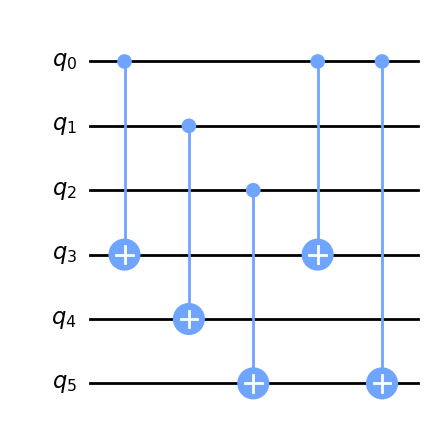

In [8]:
# Defining the number of bits in a string
n=3
# desired string (period)
c = '101'

# Creating quantum circuit having two n-qubit strings
simon_oracle1 = QuantumCircuit(2*n)

# implementing control NOT gates 

for i in range(n):
    simon_oracle1.cx(i, i+n)

# finding the string

k=0
for i in range(n-1, -1, -1):
    if c[i] == '1':
        m=n
        for j in range(n-1, -1, -1):
            print(j,i)
            if c[j] == '1':
                simon_oracle1.cx(k,m)
            m+=1
        break
    k+=1

#drawing the circuit
simon_oracle1.draw('mpl')  

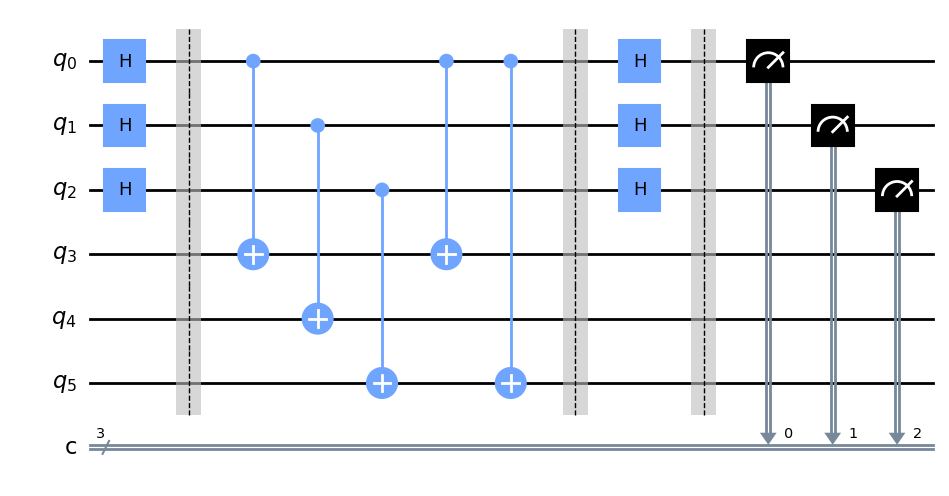

In [9]:
n = 3
# Quantum circuit having 2n qubits and n classical bits
simon = QuantumCircuit(2*n, n)

# Apply H-gates
for qubit in range(n):
    simon.h(qubit)
    
# An imaginary partition
simon.barrier()

# Add oracle

simon1 = simon.compose(simon_oracle1, inplace = True)

simon.barrier()

# Repeat H-gates
for qubit in range(n):
    simon.h(qubit)
simon.barrier()

# Measuring first 4 qubits
for i in range(n):
    simon.measure(i, i)
    
# Display circuit
simon.draw('mpl')

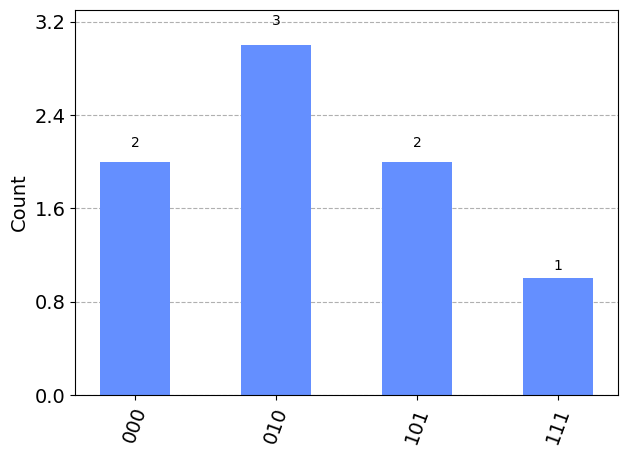

In [10]:
# use local simulator
simulator = BasicAer.get_backend('qasm_simulator')
shots = 8
noisy_results = execute(simon, backend = simulator, shots=shots).result()
noisy_counts = noisy_results.get_counts()

plot_histogram(noisy_counts)